# Segmentação de painéis solares utilizando imagens de satélite
---
# Solar Panel Segmentation Using Satellite Imagery

This script is used to see the metrics for the different evaluations of the model, considering:

* Masked/Unmasked proportions: 70/30, 80/20, 90/10
* Batch Sizes: 16, 8
* Learning rates: $\small{1 \cdot 10^{-5}} $, $\small{5 \cdot 10^{-5}} $, $ \small{1 \cdot 10^{-4}} $

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## **Imports**

In [2]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import json

## **Parameters**

In [3]:
assets_data_dir =  "/content/gdrive/MyDrive/Segmentacao_de_paineis_solares_utilizando_imagens_de_satelite/assets/"

batch_size = [16, 8]
opt_databalance = ['7030', '8020', '9010']
learning_rate = [1e-5, 5e-5, 1e-4]

In [4]:
# results = {
#     "batch_size" : batch_size,
#     "learning_rate" : learning_rate,
#     "opt_databalance" : opt_databalance,
#     "epochs" : num_epochs,
#     "aug_prob" : augment_prob,
#     "val_loss": val_loss,
#     "average_dice": average_dice,
#     "cm": cf.flatten().tolist()
# }

## **Reading metrics archives with evaluations**

In [8]:
aux = []

# Access the metrics files and saves results in aux list
for db in opt_databalance:
  for bs in batch_size:
    for lr in learning_rate:

      model_statistics_path = f'/content/gdrive/MyDrive/Segmentacao_de_paineis_solares_utilizando_imagens_de_satelite/data/processed/model_bs{bs}_lr{str(lr)}_d{db}.json' #path to save the metrics

      if os.path.isfile(model_statistics_path):
        with open(model_statistics_path) as f:
          aux.append(json.load(f))
      else:
        print(db, bs, lr)

# Creates dataframe from aux
df = pd.DataFrame(aux)
query = df['cm'].apply(pd.Series)
query.columns = ['TN','FP','FN','TP']
df = pd.concat([df, query],axis=1)

# Calculates other metrics
df['recall'] = df['TP']/(df['TP']+df['FN'])
df['precision'] = df['TP']/(df['TP']+df['FP'])
df['f1_score'] = (2 * df['precision'] * df['recall'])/(df['precision'] + df['recall'])
df['results'] = (df['f1_score'] + df['average_dice'])/2

# Displays Dataframe
display(df)

,batch_size,learning_rate,opt_databalance,epochs,aug_prob,val_loss,average_dice,cm,TN,FP,FN,TP,recall,precision,f1_score,results
0,16,0.00001,7030,5,0.2,0.065943,0.866717,"[959, 182, 27, 2634]",959,182,27,2634,0.989853,0.935369,0.961840,0.914279
1,16,0.00005,7030,5,0.2,0.011470,0.899853,"[1057, 84, 54, 2607]",1057,84,54,2607,0.979707,0.968785,0.974215,0.937034
2,16,0.00010,7030,5,0.2,0.008592,0.907238,"[1046, 95, 32, 2629]",1046,95,32,2629,0.987974,0.965125,0.976416,0.941827
3,8,0.00001,7030,5,0.2,0.037067,0.845191,"[852, 289, 22, 2639]",852,289,22,2639,0.991732,0.901298,0.944355,0.894773
4,8,0.00005,7030,5,0.2,0.008720,0.901445,"[1025, 116, 21, 2640]",1025,116,21,2640,0.992108,0.957910,0.974709,0.938077
5,8,0.00010,7030,5,0.2,0.007312,0.902408,"[1021, 120, 33, 2628]",1021,120,33,2628,0.987599,0.956332,0.971714,0.937061
6,16,0.00001,8020,5,0.2,0.068529,0.859744,"[585, 80, 50, 2611]",585,80,50,2611,0.981210,0.970271,0.975710,0.917727
7,16,0.00005,8020,5,0.2,0.016809,0.901408,"[575, 90, 10, 2651]",575,90,10,2651,0.996242,0.967165,0.981488,0.941448
8,16,0.00010,8020,5,0.2,0.010672,0.893019,"[567, 98, 20, 2641]",567,98,20,2641,0.992484,0.964221,0.978148,0.935583
9,8,0.00001,8020,5,0.2,0.037437,0.886357,"[583, 82, 26, 2635]",583,82,26,2635,0.990229,0.969820,0.979918,0.933138


In [9]:
df.to_csv(f'/content/gdrive/MyDrive/Segmentacao_de_paineis_solares_utilizando_imagens_de_satelite/data/results/model_eval.csv')

## **Plot Graphs with Results**

<ipython-input-10-a0437cba34cf>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  map = query.pivot("batch_size", "learning_rate", graph[0])
<ipython-input-10-a0437cba34cf>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  map = query.pivot("batch_size", "learning_rate", graph[0])
<ipython-input-10-a0437cba34cf>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  map = query.pivot("batch_size", "learning_rate", graph[0])
<ipython-input-10-a0437cba34cf>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  map = query.pivot("batch_size", "learning_rate", graph[0])
<ipython-input-10-a0437cba34cf>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  map = query.pivot("batch_size", "learning_rate", graph[0])
<ipython-input-

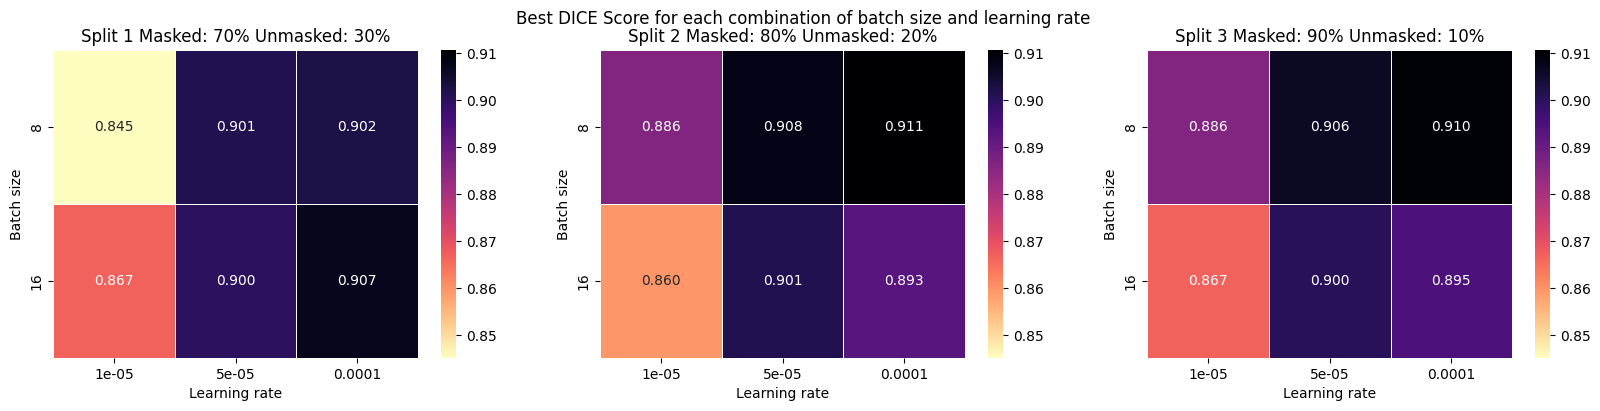

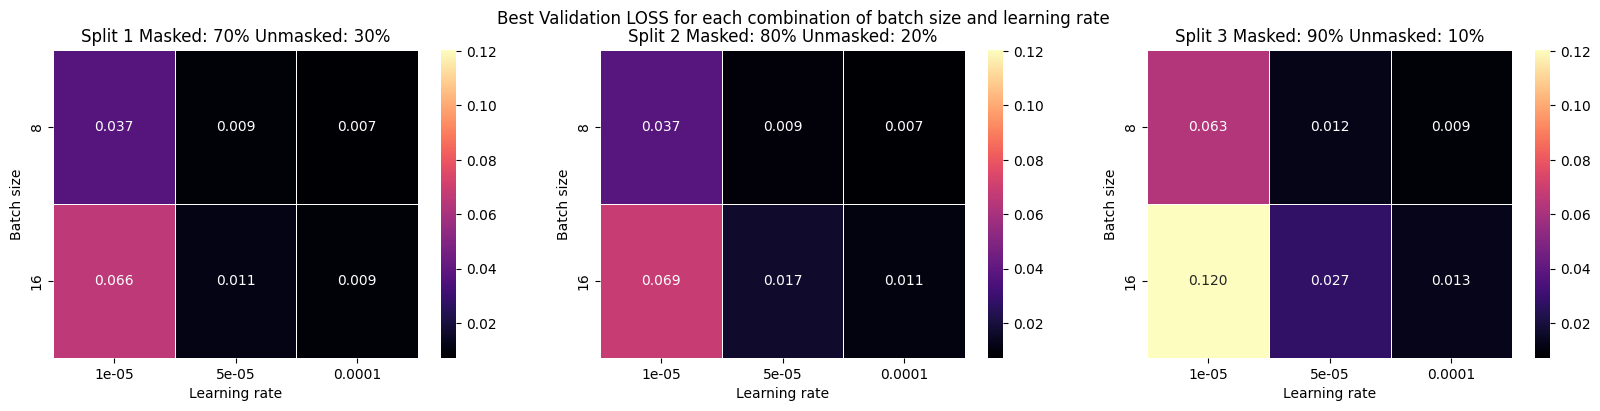

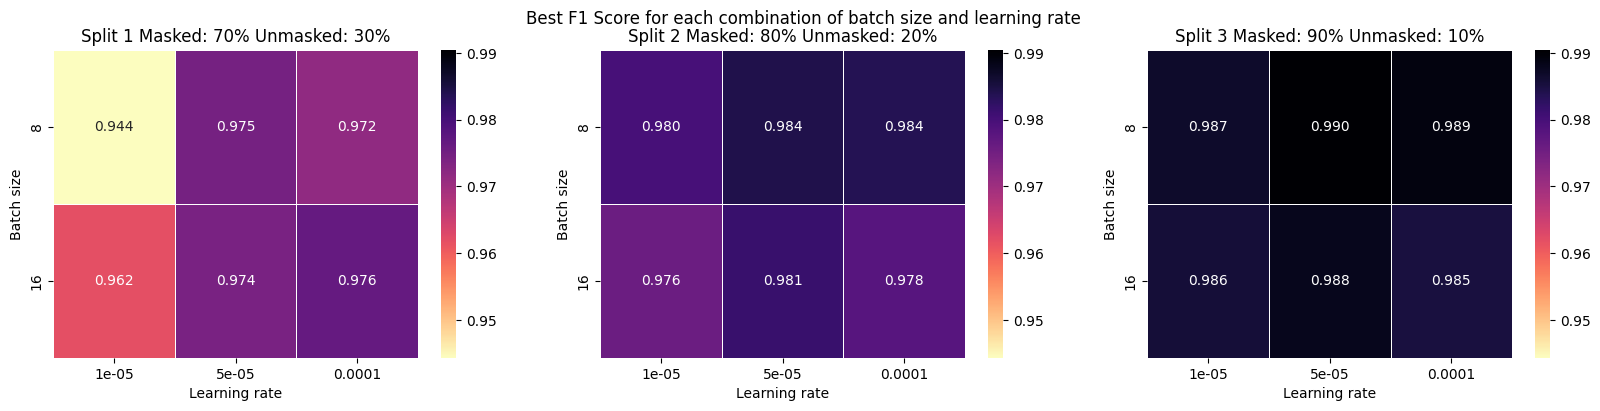

In [10]:
# Plot the graphs automatically
graph_type = [["average_dice", "DICE Score"], ["val_loss", "Validation LOSS"], ["f1_score", "F1 Score"]]

for graph in graph_type:
  f, ax = plt.subplots(ncols=3, figsize=(20,4))

  for idx, db in enumerate(opt_databalance):
    query = df[df["opt_databalance"]==db][["batch_size", "learning_rate", graph[0]]]
    query2 = df[graph[0]]

    map = query.pivot("batch_size", "learning_rate", graph[0])

    # If the graph is a LOSS type, darker values (best performance) should be the smaller ones
    if 'loss' in graph[0]:
      sns.heatmap(map, annot=True,  fmt=".3f", cmap='magma', ax = ax[idx], vmin=query2.min(), vmax=query2.max(), linewidths=.5)

    # If not, higher values indicates better performance
    else:
      sns.heatmap(map, annot=True,  fmt=".3f", cmap=plt.colormaps.get_cmap('magma').reversed(), ax = ax[idx], vmin=query2.min(), vmax=query2.max(), linewidths=.5)
    ax[idx].title.set_text(f'Split {idx+1} Masked: {db[:2]}% Unmasked: {db[-2:]}%')
    ax[idx].set_xlabel('Learning rate')
    ax[idx].set_ylabel('Batch size')

  plt.suptitle(f'Best {graph[1]} for each combination of batch size and learning rate')
  # plt.show()
  plt.savefig(assets_data_dir+f'model_eval_{graph[0]}.svg', bbox_inches='tight')
  # plt.close()
